In [2]:
%pylab inline
import scipy.stats as stats
import astropy.stats as astats
import numpy.random as random


Populating the interactive namespace from numpy and matplotlib


# Exploring measurements of the Hubble parameter



In [3]:
from astropy.table import Table
import pandas

# Reading in an ASCII file

See https://pandas.pydata.org/pandas-docs/stable/reference/io.html for `pandas` format options (or http://docs.astropy.org/en/stable/io/unified.html#table-io for `Table.read()` format options). If you have a file that only reads in via astropy, you can convert to a `pandas` DataFrame via the `.to_pandas()` method of an astropy recarray.


__1) using the below code box (or a text file viewer) look at the contents of the file hubble_trim.dat__

In [4]:
!more hubble_trim.dat 

 h0| ep | em | date   |me | source                                                        |
 50   +2   -2  1996.00  AS  Tammann, G. \& Sandage, A. 1996in IAU Symp 168, {\it Examining the Black Body and Diffuse Background Raduation}, M. Kafatos, ed. (Dordrecht: Kluwer) p163.
 77  +22   -2  1996.02  AV  VandenBergh, S. 1996, in IAU Symp 168, {\it Examining the Black Body and Diffuse Background Raduation}, M. Kafatos, ed. (Dordrecht: Kluwer) p157. Wierd limits
 56   +5   -5  1996.05  OS  Sandage, A. 1996, AJ 111, 1.  Spiral Luminosity Functions
 55   +5   -5  1996.07  OS  Sandage, A. 1996, AJ 111, 18. M31+M101 look alikes.
 55  +10  -10  1996.10  AS  Tammann, G., Labhardt, L., Federspiel, M.
 84   +4   -4  1996.143 PK  Ford, H. \etal 1996, ApJ 458, 455
 76   +8   -8  1996.15  O   Zasov 1996, AstronLett 22, 71  Theory, Disk Stability
 67   +9   -9  1996.17  S   Hoeflich, P. \& Khokhlov, A. 1996, ApJ 457, 500. SN Theory
 57   +4   -4  1996.220 SS  Sandage, A. \etal 1996, ApJL 460, L15. N463

Now, we read in the file into a table named `data`:

In [5]:
# to read in with astropy.table:
data_table=Table.read('hubble_trim.dat',format='ascii.fixed_width')

# to read in with pandas:
data=pandas.read_fwf('hubble_trim.dat',widths=[4,5,5,9,3,80],comment='#',
                     names=['h0','ep','em','date','method','source'],skiprows=1)

Using the below code box, check what's in each version of the table:

__1) print out the list of column names:__ This is an attribute of the `data` object: i.e., `data.columns`, not `data.columns()`).  For an astropy `Table` or `recarray` this is `data_table.colnames`

__2) print out the first record in the table:__ In `pandas` this is `data.iloc[0,:]`; for an astropy `Table` or `recarray` it is `data_table[0]` .  `.iloc` indicates integer-based location specification -- the first coordinate slices on rows, the second slices on columns (e.g. the h0 value is column 0).  

__3) print data itself: both `pandas` and the astropy `Table` class provide 'pretty' print output.__

__4) Check out the attributes and methods associated with `data` and `data_table`: e.g., type `data.` and hit the Tab key to see a list.__

In [18]:
data.iloc[0,:]

h0                                                       50
ep                                                        2
em                                                       -2
date                                                   1996
method                                                   AS
source    Tammann, G. \& Sandage, A. 1996in IAU Symp 168...
Name: 0, dtype: object

In [ ]:
data.

Let's store the columns as separate arrays for convenience:

In [8]:
# the following method works in both pandas and astropy
#h0 = data['h0']
h0t = data_table['h0']
#errplus = data['ep']
#errminus=-data['em']
#date=data['date']

# this method works in pandas only
h0 = data.h0
errplus = data.ep
errminus=-data.em
date=data.date

## Making plots with error bars

__Bring up the documentation on `plt.errorbar` in the below code box.__

(0.0, 100.0)

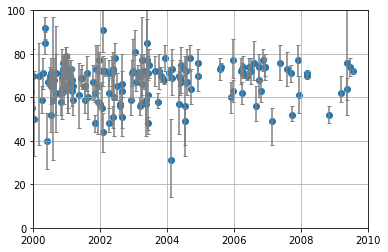

In [9]:
plt.scatter(date,h0)
plt.errorbar(date,h0,yerr=[errminus,errplus],fmt='none',capsize=2,color='grey')
plt.grid()
plt.xlim(2000,2010)
plt.ylim(0,100)

__In the below box, make a plot of H0 vs. year with error-bars given by either `errplus` or `errminus`.  Use the `fmt=` keyword to draw the points as blue circles (the same format coding as `plt.plot` is used here).  You will want to use the `yerr=` keyword.__

__Now, we want to modify the plot in the above code box to use asymmetric error bars.__  To do that, you provide a Python `list` of two arrays containg one error for each measurement; i.e., generically, `yerr = [minus_error,plus_error]` where `minus_error` is the length of the lower error bar and `plus_error` is the length of the upper.

__Also, limit the plot range to only show results from 2000 - 2010.__

## Plotting histograms of $H_0$ values

We want to compare the distributions of $H_0$ values from 1999-2001 (pre-Key Project release), 2001-2003 (pre-WMAP), and 2003-2008.  

__In the below code box, select measurements from each era and overplot histograms using different colors for each.  Use the `bins=` and/or `range=` keywords to ensure that the same binning is used for each sample, and that your binning is fine enough to be able to see the shape of the histogram (the default of 10 bins is rarely appropriate). Be sure to include a legend!__

If you read things in with pandas, you can use `np.where()` to get the indices in each array for a given date range, and then plot the corresponding values by slicing h0.iloc with those indices; e.g.:

    wh90s = np.where( np.logical_and(date > 1990, date < 2000) )
    plt.hist(h0.iloc[wh90s])
    
Alternatively, you can use a boolean array to select the rows you want:

    is90s = np.logical_and(date > 1990, date < 2000) 
    plt.hist(h0[is90s])

If you read things in as an astropy `Table` or `recarray`, you can use `np.where()` to get the indices, and then plot the corresponding values by slicing the h0 values with those indices; e.g.:

    wh90s = np.where( np.logical_and(date > 1990, date < 2000) )
    plt.hist(h0t[wh90s])
    
    

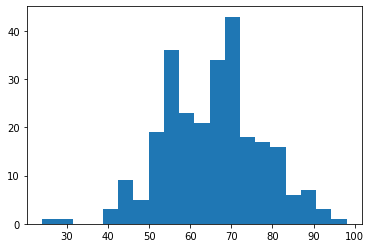

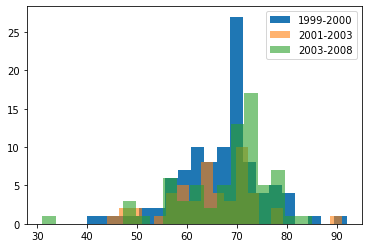

In [15]:
b=20
wh90s = np.where( np.logical_and(date > 1990, date < 2000))
plt.hist(h0.iloc[wh90s],bins=b)
plt.show()
# is90s = np.logical_and(date > 1990, date < 2000) 
plt.hist(h0[(date > 1999) & (date < 2001)],label='1999-2000',bins=b)
plt.hist(h0[(date > 2001) & (date < 2003)],label='2001-2003',bins=b,alpha=0.6)
plt.hist(h0[(date > 2003) & (date < 2008)],label='2003-2008',bins=b,alpha=0.6)
plt.legend()

# If you're waiting for other groups...

- Try exploring the recarray version of the data (`data_table`) and applying its methods.

- Matplotlib offers many customization options.  Check out http://matplotlib.org/users/customizing.html#dynamic-rc-settings for discussion of how to change the settings temporarily for a program (using `mpl.rc()`).  The example matplotlibrc file at the end of that page lists all the possible things to change; e.g. to change the linewidth (lines.linewidth in the matplotlibrc file) you would do 

    mpl.rc('lines',linewidth=2.0)
    
Try changing various line/font/etc. settings for your plots above.

A good way to help make your plots prettier is to look at example code for the plots in the matplotlib gallery, https://matplotlib.org/stable/gallery/index.html .    

# Bootstrap resampling

In Python, one way to generate bootstraps, which works with numpy arrays but __not__ pandas series, is generating an array of random index numbers (i.e., sets of indices within the orignal array), and then addressing the original array we want to make bootstraps from with the array of index numbers.  Their shapes need not match.

The easy way, though, is to use `numpy.random.choice()`.  __Check the documentation on this routine in the code box below.__

If we want a one-dimensional array of samples, the `.sample()` method of a dataframe (or series) works. However, we want 2D, as we will create a set of `nbootstraps` new samples each of length `ndata`, so we couldn't use `Dataframe.sample()` without having to loop over the number of bootstrap samples.  

Note that in general the default value of `replace=True` is what you want for bootstraps.

In [23]:
?numpy.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
-------
samples : single item or ndarray
    The generated random sampl

In [24]:
hdata=h0[date > 2001]
ndata=len(hdata)
nbootstraps=int(1E4)

# The below code would work if we used astropy, but not pandas.  
#bootidx=np.floor((random.rand(nbootstraps,ndata)*ndata))
#bootidx=bootidx.astype(int)
#hboot=hdata[bootidx]

# this works in pandas:
hboot=np.random.choice(hdata,(nbootstraps,ndata))


In the code box below, 

__1) determine the minimum and maximum values in hdata and in hboot__

__2) Plot a histogram of the values in `np.ravel(hboot)`__

__3) Determine the dimensions of hboot using `np.shape()`__

In [29]:
print(hdata.max())
print(hdata.min())
print(hboot.max())
print(hboot.min())

91.0
31.0
91.0
31.0


(array([  9927.,      0.,      0.,      0.,      0.,      0.,   9798.,
             0.,  30034.,  20195.,  40220.,      0.,  50419.,  70592.,
         69935.,  79831.,  90351.,  79821.,  89752., 120526., 219426.,
        179714.,  59651.,  89819.,      0.,   9951.,      0.,   9985.,
             0.,  10053.]),
 array([31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51., 53., 55.,
        57., 59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81.,
        83., 85., 87., 89., 91.]),
 <BarContainer object of 30 artists>)

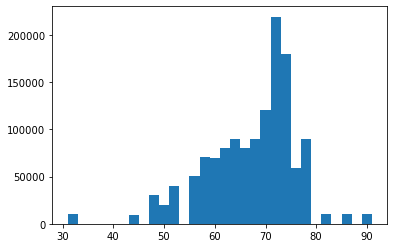

In [31]:
plt.hist(np.ravel(hboot),bins=30)

In [32]:
np.shape(hboot)

(10000, 134)

### Using the bootstrap simulations

We can, for instance, compute the standard deviation of the mean for `hdata` by determining the standard deviation of the mean values from each bootstrap realization; but we could do this for any other statistic, too.  __Compare the standard deviation of the mean & of the median to what you'd expect for the standard error, using the code box below.__

In [34]:
err_predicted=np.std(hdata)/np.sqrt(ndata)

# compare to the standard deviation amongst the means, or amongst the medians, of each bootstrap sample:
means=np.zeros(nbootstraps)

# the slow way
for i in np.arange(nbootstraps):
    means[i]=np.mean(hboot[i,:])
    
# the fast way    
medians = np.median(hboot,axis=1)    
    
#print ??? # write code to print the mean and median of the means
#print ??? # write code to print the mean and median of hdata
#print ???  # write code to print the std. dev. of the means and of the medians, 
# and compare to the predicted error


__What do the distributions look like?  Plot the histograms of both means and medians and compare (use a bin size of 0.1).  Discuss with your group: why do these look different from each other?__


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   0.,   4.,   7.,
          4.,   7.,  11.,  14.,  32.,  27.,  41.,  48.,  73., 108., 116.,
         97., 179., 213., 199., 255., 302., 346., 404., 390., 531., 485.,
        557., 537., 553., 522., 512., 491., 422., 387., 383., 308., 282.,
        245., 202., 171., 143., 107.,  80.,  56.,  39.,  38.,  22.,  14.,
          6.,   8.,   6.,   2.,   2.,   3.,   2.,   2.,   1.,   0.,   0.]),
 array([60. , 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61. ,
        61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62. , 62.1,
        62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63. , 63.1, 63.2,
        63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64. , 64.1, 64.2, 64.3,
        64.4, 64.5, 64.6, 64.7, 64.8

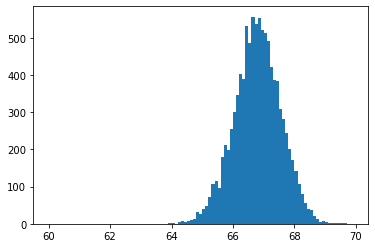

In [38]:
plt.hist(means,bins=np.arange(60,70,0.1))

(array([2.000e+00, 2.000e+00, 0.000e+00, 1.100e+01, 0.000e+00, 1.400e+01,
        1.420e+02, 0.000e+00, 8.300e+01, 3.000e+00, 6.930e+02, 4.480e+02,
        3.360e+02, 1.038e+03, 1.700e+01, 5.590e+02, 2.082e+03, 0.000e+00,
        6.560e+02]),
 array([64. , 64.3, 64.6, 64.9, 65.2, 65.5, 65.8, 66.1, 66.4, 66.7, 67. ,
        67.3, 67.6, 67.9, 68.2, 68.5, 68.8, 69.1, 69.4, 69.7]),
 <BarContainer object of 19 artists>)

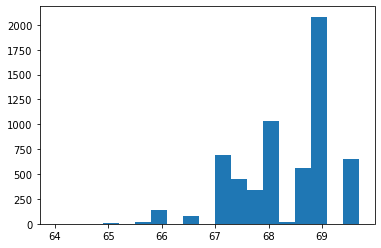

In [44]:
plt.hist(medians,bins=np.arange(64,70,0.3))

# Percentiles and Sorting

3 examples of ways to get a 95% range for the median:

In [35]:
# use np.percentile
print( np.percentile(medians, [2.5, 97.5]) )

# use np.sort to create a sorted array
sortmedians = np.sort(medians)
print( sortmedians[int(0.025*nbootstraps)],sortmedians[int(0.975*nbootstraps)] )

#use np.argsort to get an array of indices that sort the medians array
sortidx=np.argsort(medians)
print( medians[sortidx[int(0.025*nbootstraps)]], medians[sortidx[int(0.975*nbootstraps)]] )


[66.5 71. ]
66.5 71.0
66.5 71.0


__Now, using one of these methods, determine a 95% confidence interval for H0 from the means of each bootstrap sample.__

In [45]:
print( np.percentile(means, [2.5, 97.5]) )

[65.27455224 68.24029851]


# Smoothed bootstraps

We can get nicer-looking distributions of bootstrap results by adding a modest amount of noise to the data generated from bootstrapping.  Example: add N(0,1) noise to our H0 bootstraps:

In [46]:
sboot=hboot+random.randn(nbootstraps,ndata)
smeans = np.mean(sboot,axis=1) 
smedians=np.median(sboot,axis=1) 

__Overplot histograms of the `medians` and `smedians` arrays using the same binning for each.  Then, determine 95% confidence regions for the smoothed mean and smoothed median, and compare to your values from above.__

(array([0.000e+00, 1.000e+00, 3.000e+00, 9.000e+00, 1.000e+01, 2.800e+01,
        5.100e+01, 8.900e+01, 1.190e+02, 2.020e+02, 2.970e+02, 4.130e+02,
        5.500e+02, 6.690e+02, 8.420e+02, 1.019e+03, 1.045e+03, 1.133e+03,
        1.136e+03]),
 array([64. , 64.3, 64.6, 64.9, 65.2, 65.5, 65.8, 66.1, 66.4, 66.7, 67. ,
        67.3, 67.6, 67.9, 68.2, 68.5, 68.8, 69.1, 69.4, 69.7]),
 <BarContainer object of 19 artists>)

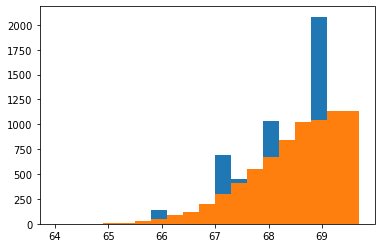

In [47]:
plt.hist(medians,bins=np.arange(64,70,0.3))
plt.hist(smedians,bins=np.arange(64,70,0.3))

In [49]:
print( np.percentile(means, [2.5, 97.5]) )
print( np.percentile(smeans, [2.5, 97.5]) )
print( np.percentile(medians, [2.5, 97.5]) )
print( np.percentile(smedians, [2.5, 97.5]) )

[65.27455224 68.24029851]
[65.25761117 68.24871532]
[66.5 71. ]
[66.58028481 70.58073476]
